In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import numpy as np

In [3]:
trk = pd.read_pickle("/media/lucas/QS/l1_nnt/trk_processed_25k.pkl")

In [4]:
trk = trk.reset_index()

In [5]:
e = trk.query("entry==0").copy()

In [6]:
n_events = e["entry"].nunique()

In [7]:
outdir = "built_graphs/test/"

In [8]:
e["unique_trk_id"] = range(len(e))

In [9]:
pv = e[e["is_pv"] == 1]
not_pv = e[e["is_pv"] == 0]

In [10]:
balanced_df = pd.concat([pd.concat([pv] * 6), not_pv])

In [11]:
balanced_df

,entry,subentry,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,unique_trk_id
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,2
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,4
50,0,50,2.584265,-0.590144,1.448720,999.0,4.804688,1,1,50
52,0,52,4.013740,-0.580180,1.616523,999.0,4.921875,1,1,52
53,0,53,2.251015,-0.292679,1.549711,999.0,5.097656,1,1,53
...,...,...,...,...,...,...,...,...,...,...
154,0,154,2.026653,-2.021094,-1.062191,999.0,-0.410156,2,0,154
155,0,155,2.049097,-2.055119,-0.964472,999.0,-0.410156,2,0,155
156,0,156,2.222179,-2.426809,-0.693084,999.0,5.566406,2,0,156
157,0,157,2.563973,2.081842,-0.530004,999.0,-3.046875,2,0,157


In [12]:
balanced_df.head(20)

,entry,subentry,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,unique_trk_id
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,2
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,4
50,0,50,2.584265,-0.590144,1.448720,999.0,4.804688,1,1,50
52,0,52,4.013740,-0.580180,1.616523,999.0,4.921875,1,1,52
53,0,53,2.251015,-0.292679,1.549711,999.0,5.097656,1,1,53
63,0,63,3.648375,-0.270140,1.969368,999.0,5.156250,1,1,63
65,0,65,3.591719,-0.147898,2.116640,999.0,4.921875,1,1,65
94,0,94,3.208672,-0.300160,-2.669568,999.0,5.097656,1,1,94
105,0,105,2.111450,-0.042956,-2.248784,999.0,4.980469,1,1,105
107,0,107,11.259640,-0.167189,-1.932643,999.0,4.980469,1,1,107


So the problem with rebalancing them like this is that the "entry" and "subentry" and also the index of the dataframe repeat, Idk if this will be a problem though

In [13]:
balanced_df.shape

(234, 10)

In [14]:
print(pv.shape, 6 * pv.shape[0], not_pv.shape[0])

(15, 10) 90 144


In [15]:
balanced_df[["entry", "unique_trk_id"]]

,entry,unique_trk_id
2,0,2
4,0,4
50,0,50
52,0,52
53,0,53
...,...,...
154,0,154
155,0,155
156,0,156
157,0,157


In [16]:
balanced_df[["entry", "unique_trk_id"]].merge(
    balanced_df[["unique_trk_id", "entry"]], on="entry"
)

,entry,unique_trk_id_x,unique_trk_id_y
0,0,2,2
1,0,2,4
2,0,2,50
3,0,2,52
4,0,2,53
...,...,...,...
54751,0,158,154
54752,0,158,155
54753,0,158,156
54754,0,158,157


So actually the repeating indices are not a bug, they are desirable because they are used for the adjacency matrix

In [17]:
combos = balanced_df[["entry", "unique_trk_id"]].merge(
    balanced_df[["unique_trk_id", "entry"]], on="entry", suffixes=("_1", "_2")
)

In [18]:
combos.head(20)

,entry,unique_trk_id_1,unique_trk_id_2
0,0,2,2
1,0,2,4
2,0,2,50
3,0,2,52
4,0,2,53
5,0,2,63
6,0,2,65
7,0,2,94
8,0,2,105
9,0,2,107


So I think if we wanted to cut the graph down such that only connections inside a radius of like 0.15 cm in z0 are included we can include this here by getting like z0_1 and z0_2 then take the difference and drop all connections that are like above the eps value

In [19]:
combos = combos[combos["unique_trk_id_1"] != combos["unique_trk_id_2"]]

In [20]:
combos["unique_trk_id_1"].values

array([  2,   2,   2, ..., 158, 158, 158])

In [21]:
connections = np.stack(
    (combos["unique_trk_id_1"].values, combos["unique_trk_id_2"].values)
)

In [22]:
X = balanced_df[["trk_pt", "trk_eta", "trk_phi", "trk_z0"]].values

In [24]:
def my_print(f, x, edge_index, y):
    print(f"{f} {x} {edge_index} {y}")

In [25]:
my_print("test", **dict(x="m1", edge_index="m2", y="m3"))

test m1 m2 m3


In [26]:
my_print("test", x="m1", edge_index="m2", y="m3")

test m1 m2 m3


In [27]:
import networkx as nx

In [28]:
G = nx.Graph()

In [29]:
my_list_test = [
    {
        i: {"pt": X[i, 0], "eta": X[i, 1], "phi": X[i, 2], "z0": X[i, 3]}
        for i in range(X.shape[0])
    }
]

In [30]:
xdf = pd.DataFrame(X, columns=["pt", "eta", "phi", "z0"])

In [31]:
nx.set_node_attributes(G, pd.Series(xdf.pt, index=xdf.index).to_dict(), "pt")
nx.set_node_attributes(G, pd.Series(xdf.eta, index=xdf.index).to_dict(), "eta")
nx.set_node_attributes(G, pd.Series(xdf.phi, index=xdf.index).to_dict(), "phi")
nx.set_node_attributes(G, pd.Series(xdf.z0, index=xdf.index).to_dict(), "z0")

In [32]:
G.nodes.data()

NodeDataView({})

In [33]:
G.add_edges_from(my_list_test[0])

TypeError: object of type 'int' has no len()

In [ ]:
G.add_nodes_from(X[:, 0])

In [34]:
G.add_edges_from(connections.T)

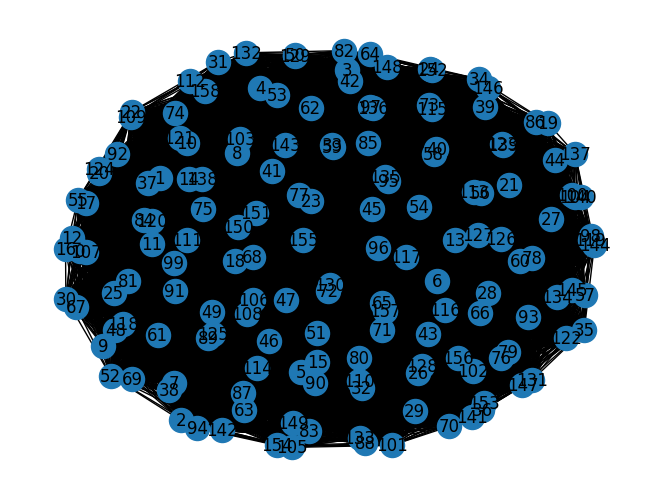

In [35]:
nx.draw(G, with_labels=True)

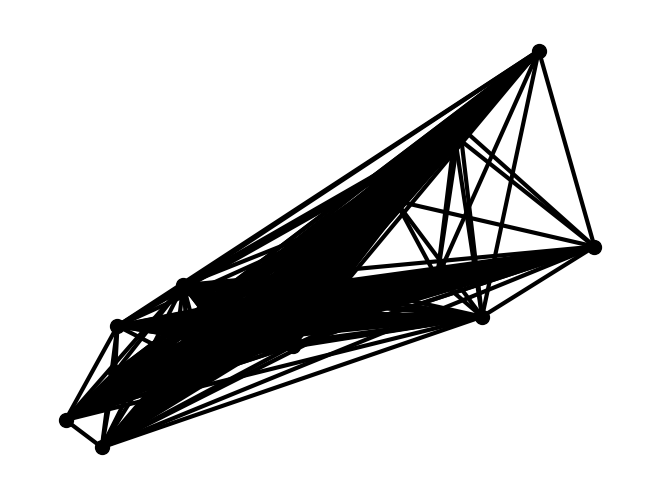

In [36]:
nx.draw_spectral(G, node_color="black", node_size=100, width=3)

In [37]:
pd.DataFrame({"source": [0, 1], "target": [1, 2], "weight": [100, 50]})

,source,target,weight
0,0,1,100
1,1,2,50


In [38]:
connections

array([[  2,   2,   2, ..., 158, 158, 158],
       [  4,  50,  52, ..., 155, 156, 157]])

In [39]:
edges = pd.DataFrame({"source": connections[0], "target": connections[1]})

In [40]:
xdf["node"] = range(X.shape[0])

In [41]:
xdf

,pt,eta,phi,z0,node
0,3.774908,1.815973,-0.240375,4.921875,0
1,2.320653,1.837421,0.032604,4.980469,1
2,2.584265,-0.590144,1.448720,4.804688,2
3,4.013740,-0.580180,1.616523,4.921875,3
4,2.251015,-0.292679,1.549711,5.097656,4
...,...,...,...,...,...
229,2.026653,-2.021094,-1.062191,-0.410156,229
230,2.049097,-2.055119,-0.964472,-0.410156,230
231,2.222179,-2.426809,-0.693084,5.566406,231
232,2.563973,2.081842,-0.530004,-3.046875,232


In [42]:
G = nx.from_pandas_edgelist(edges, source="source", target="target")

In [43]:
nx.set_node_attributes(G, pd.Series(xdf.pt, index=xdf.index).to_dict(), "pt")
nx.set_node_attributes(G, pd.Series(xdf.eta, index=xdf.index).to_dict(), "eta")
nx.set_node_attributes(G, pd.Series(xdf.phi, index=xdf.index).to_dict(), "phi")
nx.set_node_attributes(G, pd.Series(xdf.z0, index=xdf.index).to_dict(), "z0")

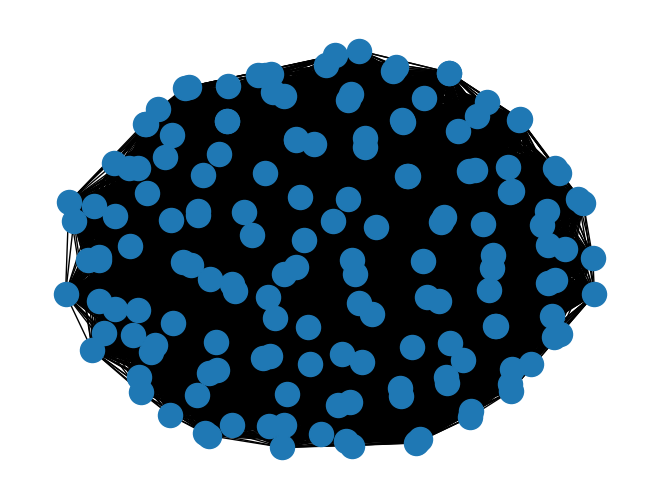

In [44]:
nx.draw(G)

# plotly graph

**SAVE FOR SOME OTHER TIME**

In [45]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

In [ ]:
gt = nx.random_geometric_graph(200, 0.125)

In [46]:
gt.nodes["pos"]

NameError: name 'gt' is not defined

In [47]:
G.nodes[2]["pt", "eta", "phi", "z0"]

KeyError: ('pt', 'eta', 'phi', 'z0')

In [48]:
edge_x = []
edge_y = []
for edge in G.edges():
    # print(edge[0])

    x0, y0 = G.nodes[edge[0]]["pt"]
    x1, y1 = G.nodes[edge[1]]["pt"]

    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)

    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

TypeError: cannot unpack non-iterable float object

In [ ]:
fig = go.Figure(data=[edgesa])

# load a grph from a npz fileX 


In [49]:
G1 = np.load("built_graphs/rebalanced/graph_0.npz")

# Build a graph with a radius parameter

In [54]:
def build_graph(
    event: pd.DataFrame, radius: float = 0.15
) -> (np.array, np.array, np.array):
    """
    Builds a graph from the event dataframe.

    Parameters :
        event: pd.DataFrame containing the event data
        radius: float the maximum distance in z0 between two tracks to be connected
    returns:
        X: np.array containing node features
        edge_index: np.array containing the edges of nodes
        y: np.array containing the labels of the nodes

    """

    event["unique_trk_id"] = range(event.shape[0])

    # On average 85% of samples are not primary vertex, repeat true vertices to rebalance
    pv = event[event["is_pv"] == 1]
    not_pv = event[event["is_pv"] == 0]

    balanced_df = pd.concat([pd.concat([pv] * 6), not_pv])

    # Fully connected edges
    combos = balanced_df[["entry", "unique_trk_id", "trk_z0"]].merge(
        balanced_df[["unique_trk_id", "entry", "trk_z0"]],
        on="entry",
        suffixes=("_1", "_2"),
    )

    # remove node connections to itself
    combos = combos[combos["unique_trk_id_1"] != combos["unique_trk_id_2"]]

    # remove connections that are too far apart in z0 space
    combos["abs_diff"] = np.abs(combos["trk_z0_1"] - combos["trk_z0_2"])

    combos = combos[combos["abs_diff"] < radius]

    # edge indices in the correct format
    connections = np.stack(
        (combos["unique_trk_id_1"].values, combos["unique_trk_id_2"].values)
    )

    X = balanced_df[["trk_pt", "trk_eta", "trk_phi", "trk_z0"]].values
    y = balanced_df[["is_pv"]].values

    return X, connections, y

### Test the new graph building

In [56]:
e.head()

,entry,subentry,trk_pt,trk_eta,trk_phi,trk_d0,trk_z0,trk_fake,is_pv,unique_trk_id
0,0,0,2.623967,1.301414,-0.289234,999.0,-0.878906,2,0,0
1,0,1,3.435026,0.566814,-0.159267,999.0,3.339844,2,0,1
2,0,2,3.774908,1.815973,-0.240375,999.0,4.921875,1,1,2
3,0,3,2.641448,-1.435747,-0.128747,999.0,-0.468750,2,0,3
4,0,4,2.320653,1.837421,0.032604,999.0,4.980469,1,1,4


In [57]:
X, edge_list, y = build_graph(e, radius=0.15)

In [58]:
edge_list.shape

(2, 6338)

In [59]:
edges_df = pd.DataFrame({"source": edge_list[0], "target": edge_list[1]})
x_df = pd.DataFrame(X, columns=["pt", "eta", "phi", "z0"])

In [61]:
G_s = nx.Graph()
G_s = nx.from_pandas_edgelist(edges_df, source="source", target="target")
nx.set_node_attributes(G_s, pd.Series(x_df.pt, index=x_df.index).to_dict(), "pt")
nx.set_node_attributes(G_s, pd.Series(x_df.eta, index=x_df.index).to_dict(), "eta")
nx.set_node_attributes(G_s, pd.Series(x_df.phi, index=x_df.index).to_dict(), "phi")
nx.set_node_attributes(G_s, pd.Series(x_df.z0, index=x_df.index).to_dict(), "z0")

In [74]:
options = {
    "font_size": 36,
    "node_size": 20,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
}

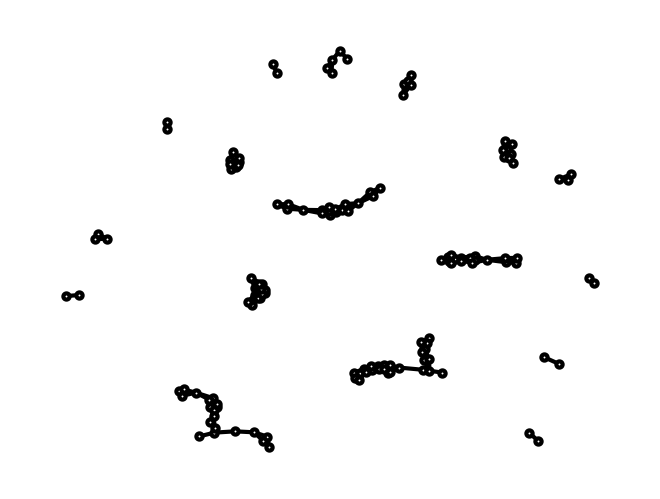

In [75]:
nx.draw(G_s, **options)

In [85]:
print(G_s.nodes.data()[0]["z0"])
print(G_s.nodes.data()[1]["z0"])

4.921875
4.98046875


In [87]:
pos

,pt,eta,phi,z0
0,3.774908,1.815973,-0.240375,4.921875
1,2.320653,1.837421,0.032604,4.980469
2,2.584265,-0.590144,1.448720,4.804688
3,4.013740,-0.580180,1.616523,4.921875
4,2.251015,-0.292679,1.549711,5.097656
...,...,...,...,...
229,2.026653,-2.021094,-1.062191,-0.410156
230,2.049097,-2.055119,-0.964472,-0.410156
231,2.222179,-2.426809,-0.693084,5.566406
232,2.563973,2.081842,-0.530004,-3.046875


In [107]:
pos = {i: (x_df.iloc[i, -1], 0) for i in x_df.index}

In [105]:
x_df.iloc[0, -1]

4.921875

In [109]:
options = {
    "font_size": 0,
    "node_size": 20,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

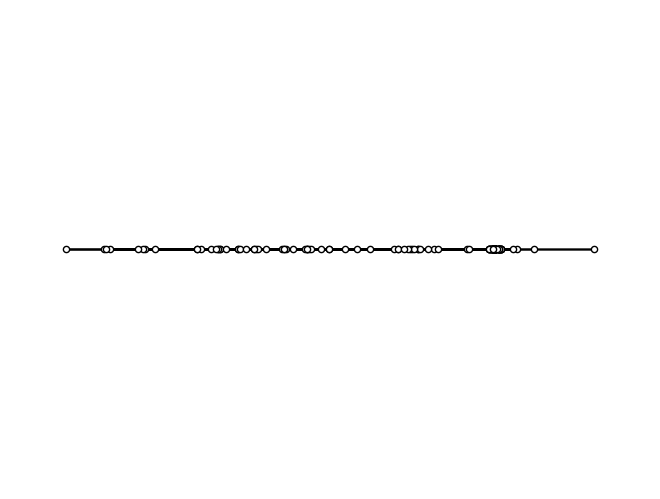

In [110]:
nx.draw(G_s, pos, **options)